In [1]:
data = read.csv("C:/Users/Vsh/Documents/GitHub/Credit-Card-Fraud-Detection/creditcard.csv")

In [2]:
head(data)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
names(data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [4]:
table(max(data$Amount),min(data$Amount))

          
           0
  25691.16 1

In [5]:
# V1-V28 these are principal components
# Time- since it is a transactional data set, will have more than 1 line for a specific time period
# Amount- amount involved in the transaction
# Class- target variable

In [6]:
# Exploratory data analysis
# Univariate: distributions
# Bi-variate: correlations
# Multivariate: correlations

In [7]:
#table(data$Time,data$Class)

In [12]:
library(caret)

In [9]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


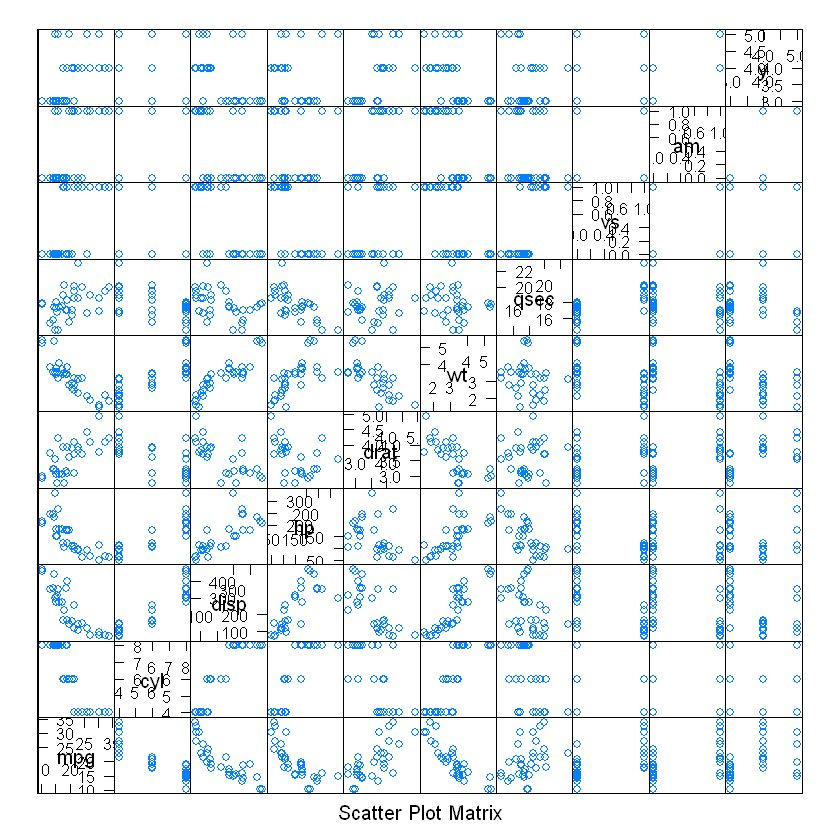

In [10]:
# pairwise plots of all the attributes by class
featurePlot(x=mtcars[,1:9],y=mtcars[,10],plot = 'pairs')

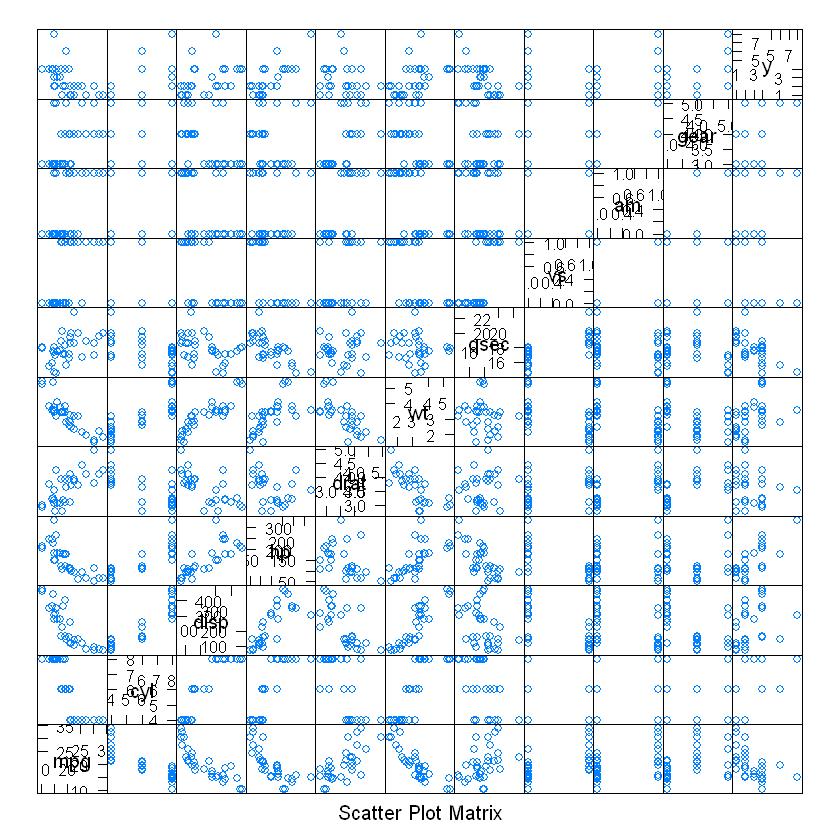

In [11]:
featurePlot(x=mtcars[,1:10],y=mtcars[,11],plot = 'pairs')

In [13]:
# density plots for each attribute by the class
featurePlot(x=data[,2:29],y=data[,31],plot = 'density')

NULL

In [17]:
library(corrplot)

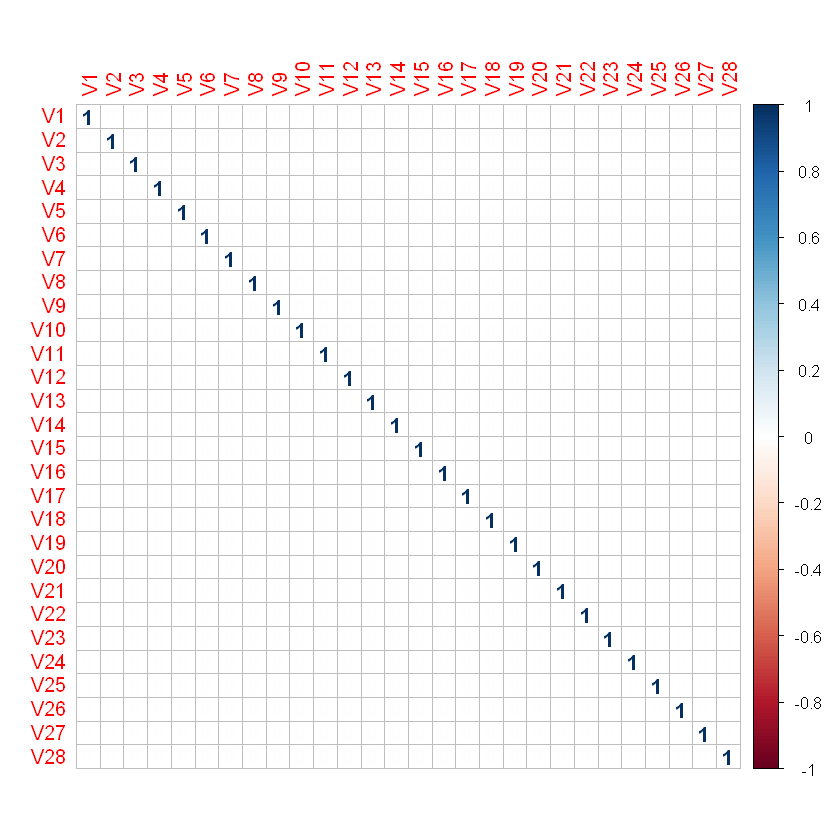

In [18]:
corrplot(cor(data[,2:29]),method = 'number')

In [19]:
table(data$Class)


     0      1 
284315    492 

In [ ]:
# Immbalanced data management

#1- oversampling
#2- undersampling
#3- Mixed sampling


In [20]:
library(unbalanced)
library(ROSE)

ERROR: Error in library(unbalanced): there is no package called 'unbalanced'


In [ ]:
# feature selction methodology

# to remove the features which are redundant (corr > 0.75)
# rank the features by their importance (Learning Vector Quantization (LVQ) model)
# select features using Recursive feature elimination (RFE) method

In [21]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [22]:
data$Class <- as.factor(data$Class)

In [23]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [24]:
library(caret)

In [25]:
data = data[,-1]

In [26]:
# data split for training and testing the models
set.seed(1234)
trainIndex = createDataPartition(data$Class,p=0.5,list=F,times = 1)

In [27]:
dataTrain = data[trainIndex,]
dataTest = data[-trainIndex,]

In [28]:
head(dataTrain)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.2778376,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.021053053,149.62,0
2,1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.6386720,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.014724169,2.69,0
3,-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.7716794,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.059751841,378.66,0
7,1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,-0.09925432,...,-0.167716266,-0.2707097,-0.15410379,-0.78005542,0.7501369,-0.2572368,0.034507430,0.005167769,4.99,0
9,-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,-0.41043043,...,-0.073425100,-0.2680916,-0.20423267,1.01159180,0.3732047,-0.3841573,0.011747356,0.142404330,93.20,0
11,1.4490438,-1.17633883,0.91385983,-1.3756667,-1.97138317,-0.62915214,-1.423235601,0.04845589,-1.7204084,1.62665906,...,-0.009301897,0.3138944,0.02774016,0.50051229,0.2513674,-0.1294780,0.042849871,0.016253262,7.80,0


In [29]:
head(dataTest)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4,-0.9662717,-0.1852260,1.7929933,-0.8632913,-0.01030888,1.24720317,0.2376089,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.1755753,0.64737603,-0.22192884,0.06272285,0.06145763,123.50,0
5,-1.1582331,0.8777368,1.5487178,0.4030339,-0.40719338,0.09592146,0.5929407,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.1412670,-0.20600959,0.50229222,0.21942223,0.21515315,69.99,0
6,-0.4259659,0.9605230,1.1411093,-0.1682521,0.42098688,-0.02972755,0.4762009,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.3714266,-0.23279382,0.10591478,0.25384422,0.08108026,3.67,0
8,-0.6442694,1.4179635,1.0743804,-0.4921990,0.94893409,0.42811846,1.1206314,-3.80786424,0.6153747,1.24937618,...,1.943465340,-1.015454710,0.05750353,-0.6497090,-0.41526657,-0.05163430,-1.20692108,-1.08533919,40.80,0
10,-0.3382618,1.1195934,1.0443666,-0.2221873,0.49936081,-0.24676110,0.6515832,0.06953859,-0.7367273,-0.36684564,...,-0.246913937,-0.633752642,-0.12079408,-0.3850499,-0.06973305,0.09419883,0.24621930,0.08307565,3.68,0
13,1.2499987,-1.2216368,0.3839302,-1.2348987,-1.48541947,-0.75323016,-0.6894050,-0.22748723,-2.0940106,1.32372927,...,-0.231809239,-0.483285330,0.08466769,0.3928309,0.16113455,-0.35499004,0.02641555,0.04242209,121.50,0


In [30]:
dim(dataTrain);dim(dataTest)

[1] 142404     30

[1] 142403     30

In [31]:
table(data$Class);table(dataTrain$Class);table(dataTest$Class)


     0      1 
284315    492 


     0      1 
142158    246 


     0      1 
142157    246 

In [32]:
# cross validation set up
control <- trainControl(method = 'repeatedcv',number=3,repeats = 3)

In [33]:
# setting up accuracy
metric <-"Accuracy"

In [34]:
# select the pre-processing method
preProcess <- c("center",'scale')

In [36]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies 'mlbench', 'SparseM', 'slam'



package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Vsh\AppData\Local\Temp\RtmpqUxUFn\downloaded_packages


In [37]:
# linear discriminant analysis
set.seed(1234)
library(MASS)
fit.lda <- train(Class~.,data=dataTrain,method = 'lda',metric = metric,preprocess = preProcess,trControl = control)

In [38]:
fit.lda

Linear Discriminant Analysis 

142404 samples
    29 predictor
     2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 3 times) 
Summary of sample sizes: 94936, 94936, 94936, 94936, 94936, 94936, ... 
Resampling results:

  Accuracy   Kappa    
  0.9993001  0.7803988
